In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def fillmissing(data):
    for col in data.columns:
        if data[col].isna().sum() > 0:
            data[col].fillna(0, inplace=True)
    return data

def encode(data, columns_list):
    for col in columns_list:
        data[col] = pd.Categorical(data[col])
        data[col] = data[col].cat.codes
        print(data[col])
    return data

def drop_columns(data, columns_list):
    data = data.drop(columns_list, axis = 1)
    return data

def binarize_columns(data, columns_list):
    for col in columns_list:
        data[col] = data[col].astype(int)
    return data

def generate_ip_attribute(data):
    temp = data['ip'].apply(lambda x: ".".join(x.split('.')[:1]))
    vc = temp.value_counts()
    data['ip'] = temp.apply(lambda x: x if vc[x]>150 else "other")
    return data

def class_resampling(data):
    from imblearn.over_sampling import RandomOverSampler

    ros = RandomOverSampler(random_state=42)

    y = train_data['notified']
    X = train_data.drop('notified', axis=1)
    # fit predictor and target variable
    x_ros, y_ros = ros.fit_resample(X, y)

    return x_ros, y_ros

train_data = pd.read_csv('./cybersecurity_training.csv', delimiter="|", header=[0])

train_data = fillmissing(train_data)

# for col in train_data.columns:
#     print(col, train_data[col].dtype)

binary_columns_list = [ 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10']
useless_columns_list = ['client_code', 'alert_ids']
one_hot_encode_columns_list = ['ip', 'categoryname', 'ipcategory_name', 'ipcategory_scope', 'parent_category', 'grandparent_category', 'weekday', 'dstipcategory_dominate', 'srcipcategory_dominate']

# Adding new attribute ip_prefix
train_data = generate_ip_attribute(train_data)

train_data = encode(train_data, one_hot_encode_columns_list)
train_data = drop_columns(train_data, useless_columns_list)
train_data = binarize_columns(train_data, binary_columns_list)
# print(train_data['notified'].value_counts())
train_x, train_y = class_resampling(train_data)
# print(len(train_y))


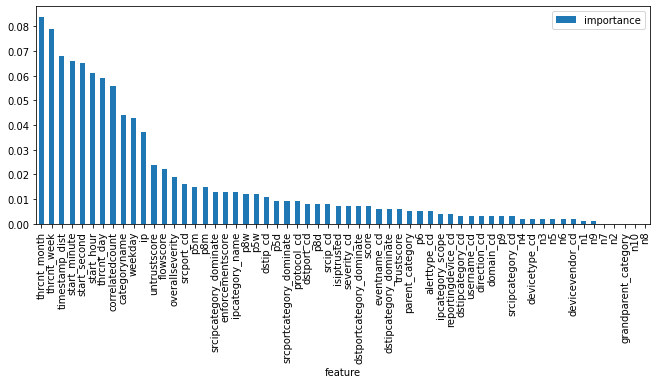

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_data.drop('notified', axis=1),  train_data['notified']);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_data.drop('notified', axis=1).columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();